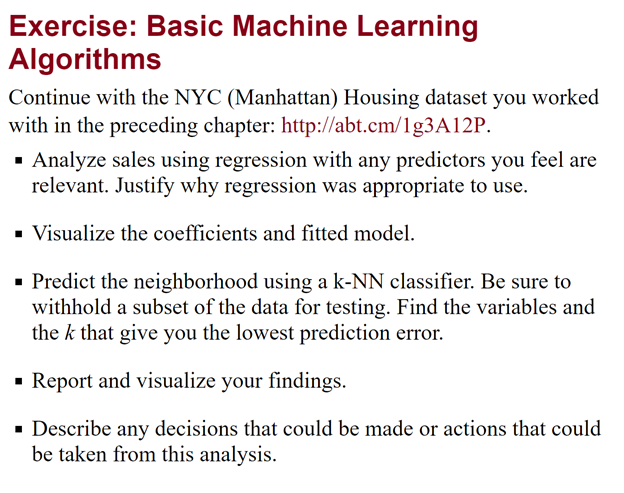

Manhattan, New York City Sales Data from March 2017 to February 2018: http://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

"""
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

from bokeh.resources import INLINE
output_notebook(resources=INLINE)
"""

'\nfrom bokeh.plotting import figure, show\nfrom bokeh.io import output_notebook\n\nfrom bokeh.resources import INLINE\noutput_notebook(resources=INLINE)\n'

In [2]:
# read input dataset
#df_sales = pd.read_csv('rollingsales_manhattan.csv')
df_sales = pd.read_csv('rollingsales_brooklyn.csv')
df_sales.head()

,borough,neighborhood,building.class.category,tax.class.at.present,block,lot,ease.ment,building.class.at.present,address,apart.ment.number,zip.code,residential.units,commercial.units,total.units,land.square.feet,gross.square.feet,year.built,tax.class.at.time.of.sale,building.class.at.time.of.sale,sale.price,sale.date,sale.price.n,gross.sqft,land.sqft
0,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,814,1103,NaN,,342 53RD STREET,,11220,0,0,0,0,0,0,2,R1,"$403,572",7/9/2013,403572.0,0,0.0
1,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,814,1105,NaN,,342 53RD STREET,,11220,0,0,0,0,0,0,2,R1,"$218,010",7/12/2013,218010.0,0,0.0
2,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,1967,1401,NaN,,290 GREENE AVE,,11238,0,0,0,0,0,0,2,R1,"$952,311",4/25/2013,952311.0,0,0.0
3,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,1967,1402,NaN,,290 GREENE AVE,,11238,0,0,0,0,0,0,2,R1,"$842,692",4/25/2013,842692.0,0,0.0
4,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,1967,1403,NaN,,290 GREENE AVE,,11238,0,0,0,0,0,0,2,R1,"$815,288",4/25/2013,815288.0,0,0.0


In [3]:
df_sales.describe()

,borough,block,lot,ease.ment,zip.code,residential.units,commercial.units,total.units,year.built,tax.class.at.time.of.sale,sale.price.n,gross.sqft,land.sqft
count,23373.0,23373.000000,23373.000000,0.0,23373.000000,23373.000000,23373.000000,23373.000000,23373.000000,23373.000000,2.337300e+04,2.337300e+04,2.337300e+04
mean,3.0,3984.270312,305.441064,NaN,11211.478929,2.155864,0.197322,2.369700,1681.096436,1.704659,5.283847e+05,3.005280e+03,3.558953e+03
std,0.0,2603.810359,497.438346,NaN,302.733649,8.076985,1.933207,8.330722,658.095440,0.915015,2.821726e+06,2.295111e+04,7.830975e+04
min,3.0,20.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.0,1638.000000,22.000000,NaN,11209.000000,1.000000,0.000000,1.000000,1901.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.0,3839.000000,48.000000,NaN,11218.000000,1.000000,0.000000,1.000000,1925.000000,1.000000,2.500000e+05,1.760000e+03,1.850000e+03
75%,3.0,6259.000000,142.000000,NaN,11230.000000,2.000000,0.000000,2.000000,1950.000000,2.000000,6.141970e+05,3.000000e+03,2.500000e+03
max,3.0,8955.000000,9039.000000,NaN,11416.000000,509.000000,222.000000,509.000000,2013.000000,4.000000,2.769470e+08,2.548000e+06,7.446955e+06


In [4]:
df_sales.columns

Index(['borough', 'neighborhood', 'building.class.category',
       'tax.class.at.present', 'block', 'lot', 'ease.ment',
       'building.class.at.present', 'address', 'apart.ment.number', 'zip.code',
       'residential.units', 'commercial.units', 'total.units',
       'land.square.feet', 'gross.square.feet', 'year.built',
       'tax.class.at.time.of.sale', 'building.class.at.time.of.sale',
       'sale.price', 'sale.date', 'sale.price.n', 'gross.sqft', 'land.sqft'],
      dtype='object')

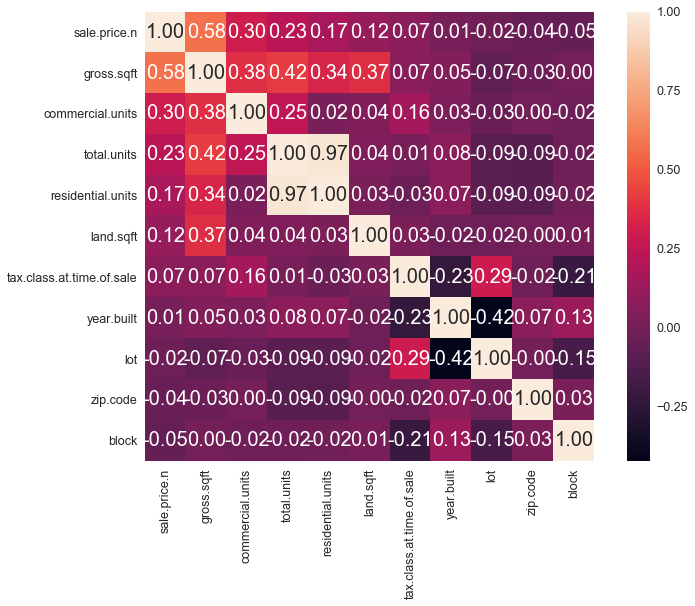

In [5]:
# correlation matrix

corrmat = df_sales.corr()
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'sale.price.n')['sale.price.n'].index
cm = np.corrcoef(df_sales[cols].values.T)

sns.set(font_scale=1.25)
fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.27)

hm = sns.heatmap(cm, cbar=True, annot=True, ax=ax,
                 square=True, fmt='.2f', annot_kws={'size': 20}, 
                 yticklabels=cols.values, xticklabels=cols.values)

plt.show()

In [6]:
# according to our preliminary assumption we understand the below columns are more correlated to " SALE PRICE "

# 1) GROSS SQUARE FEET   
# 2) COMMERCIAL UNITS
# 3) LAND SQUARE FEET

In [7]:
# perform some basic data cleaning for the correlated columns
df_sales = df_sales[df_sales['sale.price.n'].values >= 1000]
df_sales = df_sales[df_sales['gross.sqft'].values > 0]
df_sales = df_sales[df_sales['total.units'].values > 0]
df_sales = df_sales[df_sales['commercial.units'].values > 0]
df_sales = df_sales[df_sales['tax.class.at.time.of.sale'].values > 0]

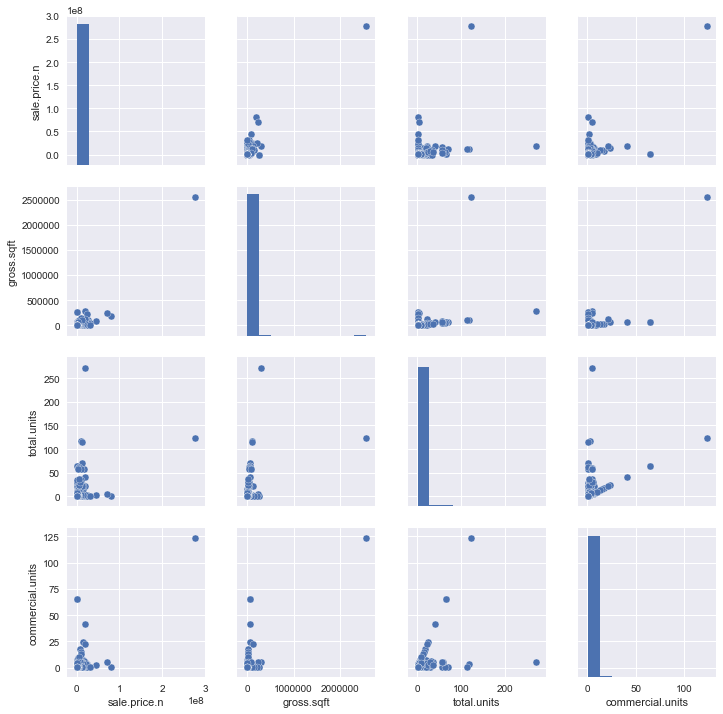

In [8]:
# scatterplot

sns.set()
cols = ['sale.price.n', 'gross.sqft', 'total.units', 'commercial.units' ]
sns.pairplot(df_sales[cols], size = 2.5)
plt.show();

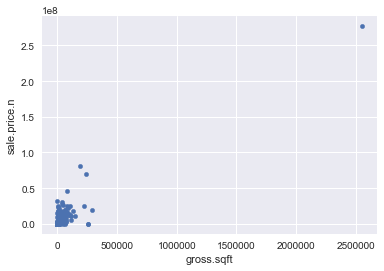

In [9]:
# bivariate analysis saleprice/grlivarea
var = 'gross.sqft'
data = pd.concat([df_sales['sale.price.n'], df_sales[var]], axis=1)
data.plot.scatter(x=var, y='sale.price.n');
plt.show()

In [10]:
# to reduce the range drop the record with highest 'SALE PRICE'value using its index
df_sales = df_sales.drop(df_sales['sale.price.n'].idxmax())
df_sales = df_sales.drop(df_sales['gross.sqft'].idxmax())

df_sales = df_sales.drop(df_sales['sale.price.n'].idxmax())
df_sales = df_sales.drop(df_sales['gross.sqft'].idxmax())

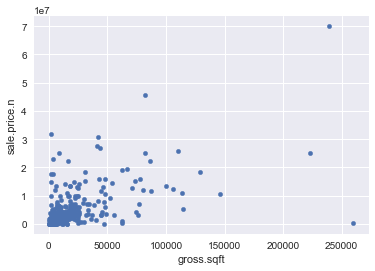

In [11]:
# bivariate analysis saleprice/grlivarea
var = 'gross.sqft'
data = pd.concat([df_sales['sale.price.n'], df_sales[var]], axis=1)
data.plot.scatter(x=var, y='sale.price.n');
plt.show()

In [12]:
df_sales_kmeans = df_sales
df_sales_knn = df_sales

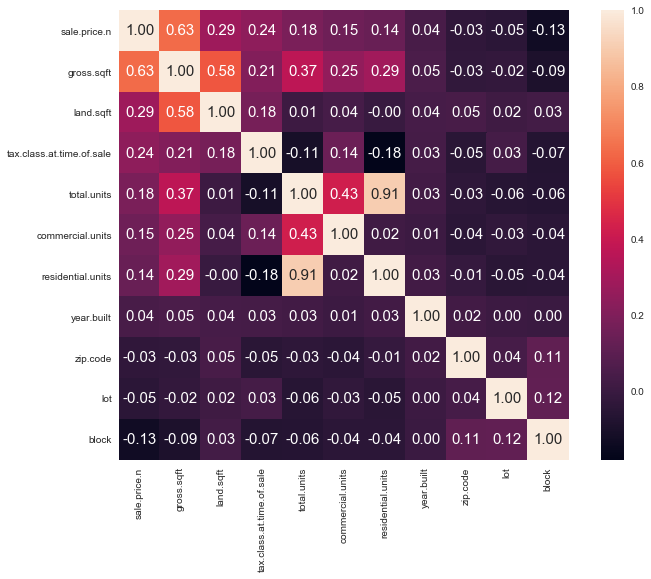

In [13]:
# correlation matrix

corrmat = df_sales.corr()
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'sale.price.n')['sale.price.n'].index
cm = np.corrcoef(df_sales[cols].values.T)

sns.set(font_scale=1)
fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.27)

hm = sns.heatmap(cm, cbar=True, annot=True, ax=ax,
                 square=True, fmt='.2f', annot_kws={'size': 15}, 
                 yticklabels=cols.values, xticklabels=cols.values)

plt.show()

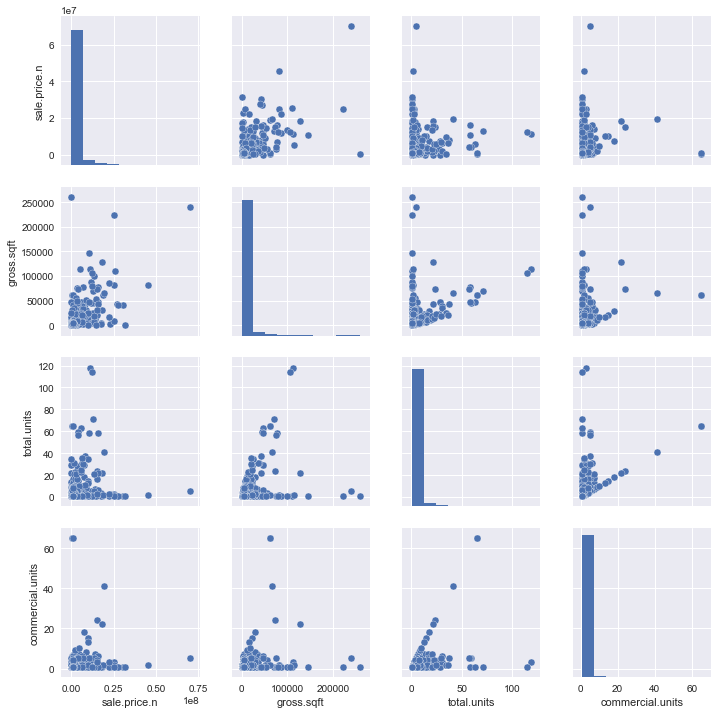

In [14]:
#scatterplot

sns.set()
cols = ['sale.price.n', 'gross.sqft', 'total.units', 'commercial.units']
sns.pairplot(df_sales[cols], size = 2.5)
plt.show();

### Modeling

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
df_sales = df_sales[['sale.price.n', 'gross.sqft']]
df_sales.head()

,sale.price.n,gross.sqft
30,820000.0,3304
32,550000.0,1800
41,1707200.0,5107
95,595000.0,4400
118,550000.0,3420


In [17]:
# create a training and test datasets 
X = df_sales[['gross.sqft']]
y = df_sales[['sale.price.n']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
# create linear regression object
regr = linear_model.LinearRegression()

# train the model using the training dataset
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# the coefficients
print('Coefficients:', regr.coef_)

# the mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Coefficients: [[ 111.77909132]]
Mean squared error: 12624561684485.75


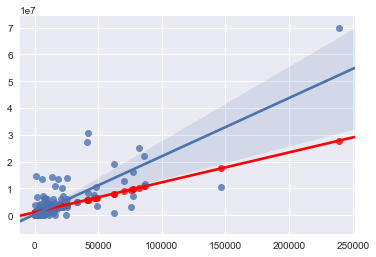

In [19]:
sns.regplot(x=X_test['gross.sqft'].values, y=y_pred[:, 0], color='red')
sns.regplot(x=X_test['gross.sqft'].values, y=y_test['sale.price.n'].values, fit_reg=True)

plt.show()

### K-Means

In [20]:
cols = ['sale.price.n', 'gross.sqft', 'total.units', 'commercial.units']
df_sales_kmeans = df_sales_kmeans[cols]
df_sales_kmeans.head()

,sale.price.n,gross.sqft,total.units,commercial.units
30,820000.0,3304,2,1
32,550000.0,1800,2,1
41,1707200.0,5107,3,1
95,595000.0,4400,3,1
118,550000.0,3420,3,1


In [21]:
M_sales = df_sales_kmeans.as_matrix()

In [22]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [23]:
normalized_X = M_sales

In [24]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(normalized_X)
labels = kmeans.predict(normalized_X)

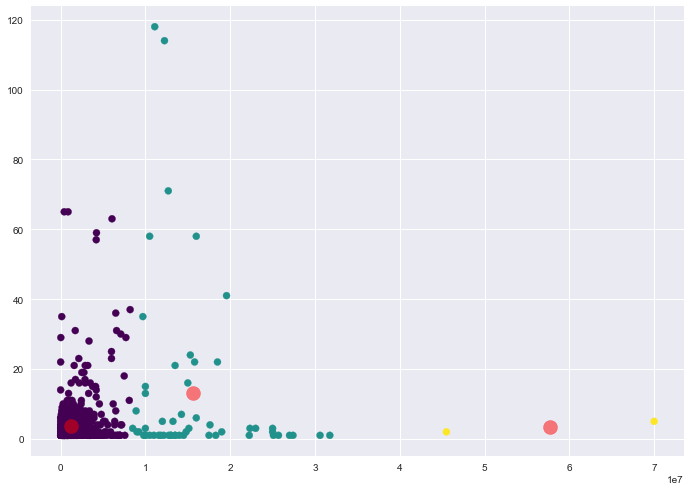

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.scatter(normalized_X[:, 0], normalized_X[:, 2], c=labels, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='Red', s=200, alpha=0.5);
plt.show()

### K-NN

In [36]:
df_sales_knn = df_sales_knn[['sale.price.n', 'gross.sqft', 'tax.class.at.time.of.sale']]
df_sales_knn.head()

,sale.price.n,gross.sqft,tax.class.at.time.of.sale
30,820000.0,3304,1
32,550000.0,1800,1
41,1707200.0,5107,1
95,595000.0,4400,1
118,550000.0,3420,1


In [37]:
sales_knn = df_sales_knn.as_matrix()

In [38]:
X = df_sales_knn.iloc[:, [0, 1]].values
y = df_sales_knn.iloc[:, 2].values

In [39]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 36)

In [40]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Calculate Accuracy over Test Dataset
correct_pred = 0
for i in y_test:
    if y_pred[i] == y_test[i]:
        correct_pred += 1
print (correct_pred/len(y_test))

0.5813148788927336


In [42]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Calculate Accuracy over Test Dataset
correct_pred = 0
for i in y_test:
    if y_pred[i] == y_test[i]:
        correct_pred += 1
print (correct_pred/len(y_test))

0.5813148788927336


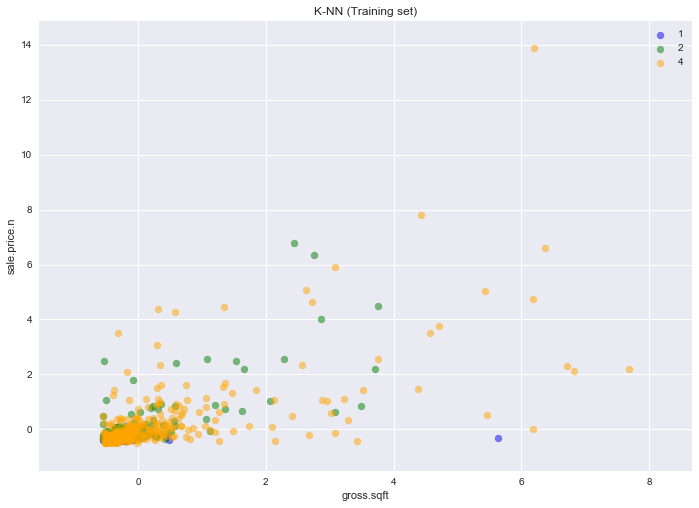

In [43]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], 
                X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'green', 'orange', 'black'))(i), label = j, alpha=0.5)
    
plt.title('K-NN (Training set)')
plt.xlabel('gross.sqft')
plt.ylabel('sale.price.n')
plt.legend()
plt.show()

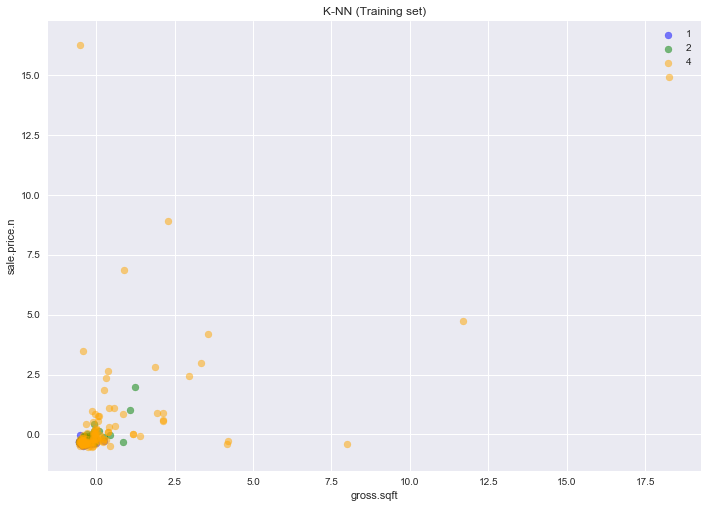

In [44]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], 
                X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'green', 'orange', 'black'))(i), label = j, alpha=0.5)
    
plt.title('K-NN (Training set)')
plt.xlabel('gross.sqft')
plt.ylabel('sale.price.n')
plt.legend()
plt.show()